<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Four_Number_Sum_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Four Number Sum

Write a function that takes in a non-empty array of distinct integers and an integer representing a target sum. The function should find all quadruplets in the array that sum up to the target sum and return a two-dimensional array of all these quadruplets in no particular order.

If no four numbers sum up to the target sum, the function should return an empty array.

Sample Input

```
array = [7, 6, 4, -1, 1, 2]
targetSum = 16
```



Sample Output

```
[[7, 6, 4, -1], [7, 6, 1, 2]] // the quadruplets could be ordered differently
```



## Solution

In [1]:
# Time: O(N^3), Space O(n) store output

def fourNumberSum(array, targetSum):
	array.sort()
	array_fourNumberSum = []
	for idx1 in range(len(array) - 3):
		for idx2 in range(idx1 + 1, len(array) - 2):
			left = idx2 + 1
			right = len(array) - 1
			while left < right:
				current_sum = array[idx1] + array[idx2] + array[left] + array[right]
				if targetSum == current_sum:
					array_fourNumberSum.append([array[idx1], array[idx2], array[left], array[right]])
					left += 1
					right -= 1
				elif targetSum > current_sum:
					left += 1
				elif targetSum < current_sum:
					right -=1
	return array_fourNumberSum



In [2]:
array = [7, 6, 4, -1, 1, 2]
targetSum = 16

In [3]:
print(fourNumberSum(array, targetSum))

[[-1, 4, 6, 7], [1, 2, 6, 7]]


## Solution (Generalize N-sum)

In [4]:
# Time: O(n^3) it will run faster in average due to early termination (pruing)
# n = no. of element in array
# Space: O(N + n)
# N = no. of Nsum. 
# O(N) is from depth of recursion 
# O(n) is to store output

def fourNumberSum(array, targetSum):
    def findNsum(array, targetSum, N, result, results):
        if len(array) < N or N < 2 or targetSum < array[0]*N or targetSum > array[-1]*N:  # early termination
            return
        if N == 2: # two pointers solve sorted 2-sum problem
            l,r = 0,len(array)-1
            while l < r:
                s = array[l] + array[r]
                if s == targetSum:
                    results.append(result + [array[l], array[r]])
                    l += 1
                    while l < r and array[l] == array[l-1]:
                        l += 1
                elif s < targetSum:
                    l += 1
                else:
                    r -= 1
        else: # recursively reduce N
            for i in range(len(array)-N+1):
                if i == 0 or (i > 0 and array[i-1] != array[i]):
                    findNsum(array[i+1:], targetSum-array[i], N-1, result+[array[i]], results)

    results = []
    findNsum(sorted(array), targetSum, 4, [], results)
    return results

In [5]:
array = [7, 6, 4, -1, 1, 2]
targetSum = 16

In [6]:
print(fourNumberSum(array, targetSum))

[[-1, 4, 6, 7], [1, 2, 6, 7]]


# Solution (Divide to 2 pair and combine later)

### conceptual note

The concept is quite complex. I illustrate in note for better understanding

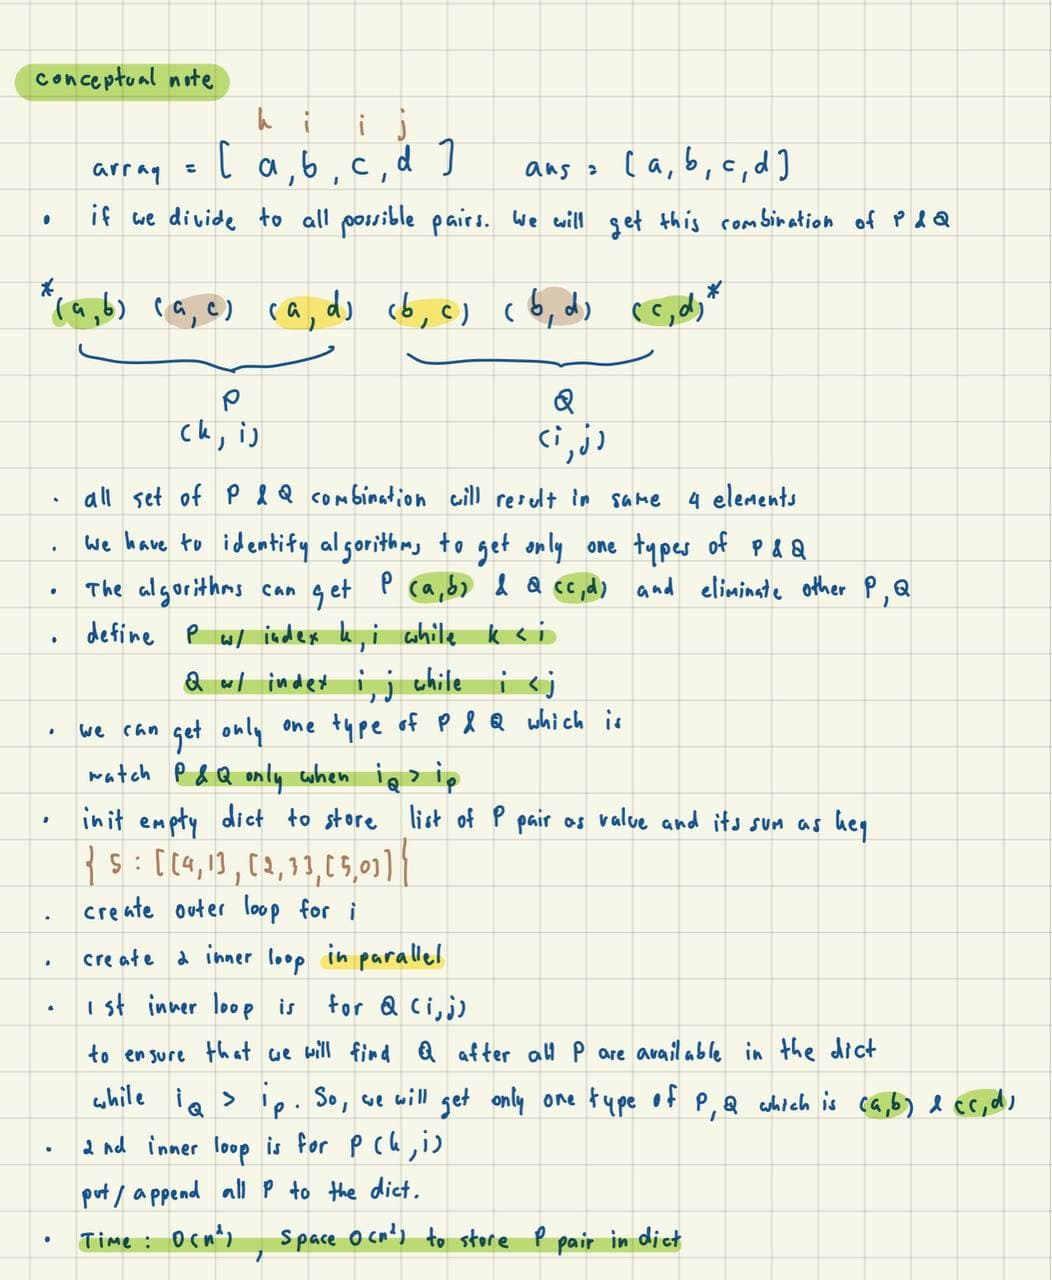

Test

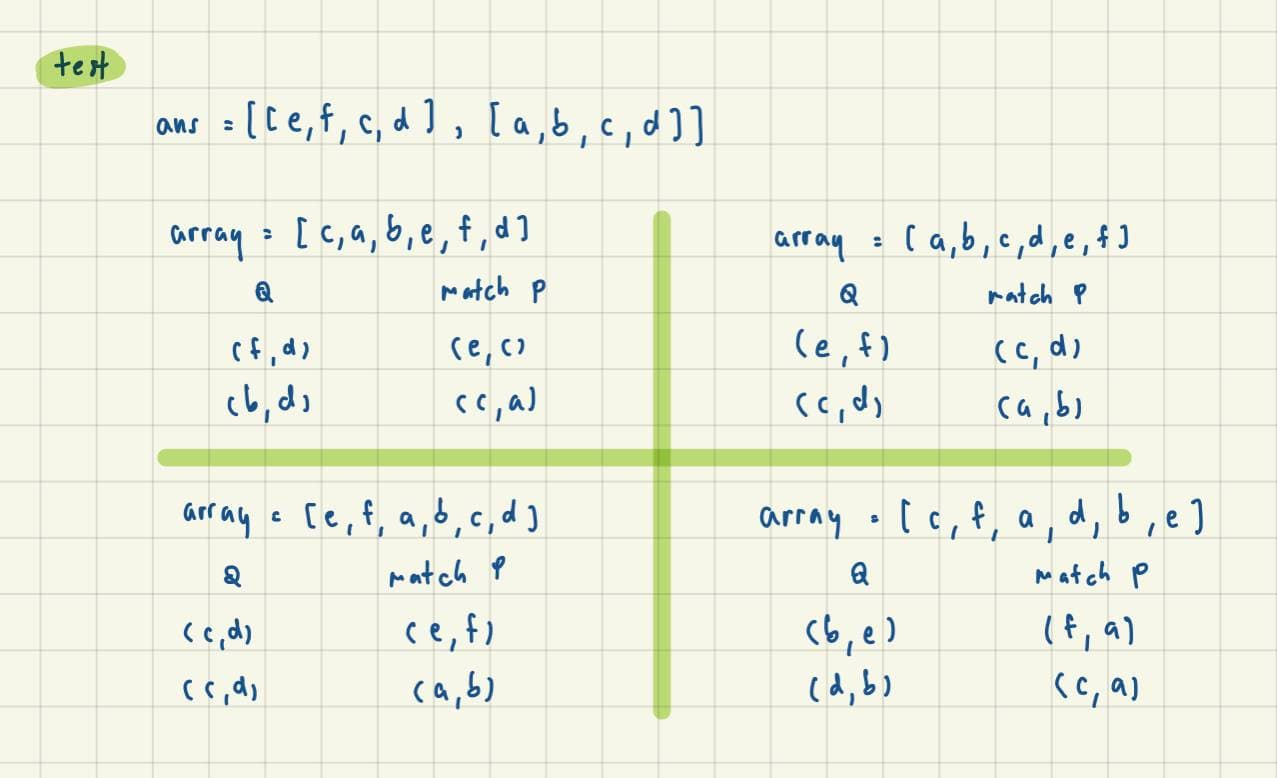

### code

In [7]:
# Time O(n^2) and Speac O(n^2)

def fourNumberSum(array, targetSum):	
	pair_sums = {}
	results = []
	
	for i in range(len(array) - 1):
		# find Q (i, j)
		for j in range(i + 1, len(array)):
			current_sum = array[i] + array[j]
			remaining = targetSum - current_sum
			if remaining in pair_sums:
				for pair in pair_sums[remaining]:
					results.append(pair + [array[i], array[j]])
		# find P
		for k in range(i):
			current_sum = array[k] + array[i]
			if current_sum in pair_sums:
				pair_sums[current_sum].append([array[k], array[i]])
			else:
				pair_sums[current_sum] = [[array[k], array[i]]]
	return results

In [8]:
array = [7, 6, 4, -1, 1, 2]
targetSum = 16

In [9]:
print(fourNumberSum(array, targetSum))

[[7, 6, 4, -1], [7, 6, 1, 2]]
